In [ ]:

from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.filters import sobel
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [ ]:
my_arrays_final = np.load("/content/drive/MyDrive/numpy_data.npz", allow_pickle=True)

In [ ]:
X_train = my_arrays_final['X_train']
y_train = my_arrays_final['y_train']
X_test = my_arrays_final['X_test']
y_test = my_arrays_final['y_test']

In [ ]:
X_train = X_train.reshape(X_train.shape[0],100,100)
X_test = X_test.reshape(X_test.shape[0],100,100)

Text(0.5, 1.0, 'Original Image')

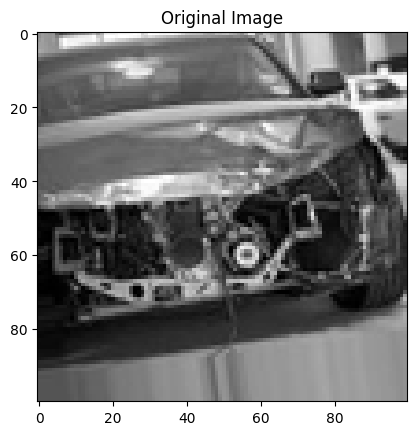

In [ ]:
img = plt.imshow(X_train[3999], cmap='gray')
plt.title('Original Image')

In [ ]:
X_test.shape

(1513, 100, 100)

Combining data

In [ ]:
X_com = np.vstack([X_train, X_test])/255
y_com = np.hstack([y_train, y_test])

Extracting the histograms for the original image

In [ ]:
def feature_extractor(dataset):
  image_dataset = pd.DataFrame()
  for image in range(dataset.shape[0]):
      img = dataset[image, :,:]
      #hist,bins = np.histogram(img.ravel(),256,[0,256])
      hist,bins = np.histogram(img.ravel(),64)
      df= pd.DataFrame(hist)
      df=df.transpose()
      image_dataset= pd.concat([image_dataset, df], ignore_index=True)
  return image_dataset

In [ ]:
OG_image = feature_extractor(X_com)

In [ ]:
columnnames1 = {}
count1 = 0
for i in OG_image.columns:
  count1 += 1
  columnnames1[i] = f"Bins_{count1}"
OG_image.rename(columns = columnnames1 ,inplace = True)

In [ ]:
df = OG_image[(OG_image.index % 5 == 0 )]

In [ ]:
OG_image[5166]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 [Text(0, 0, 'Bins_1'),
  Text(1, 0, 'Bins_2'),
  Text(2, 0, 'Bins_3'),
  Text(3, 0, 'Bins_4'),
  Text(4, 0, 'Bins_5'),
  Text(5, 0, 'Bins_6'),
  Text(6, 0, 'Bins_7'),
  Text(7, 0, 'Bins_8'),
  Text(8, 0, 'Bins_9'),
  Text(9, 0, 'Bins_10'),
  Text(10, 0, 'Bins_11'),
  Text(11, 0, 'Bins_12'),
  Text(12, 0, 'Bins_13'),
  Text(13, 0, 'Bins_14'),
  Text(14, 0, 'Bins_15'),
  Text(15, 0, 'Bins_16'),
  Text(16, 0, 'Bins_17'),
  Text(17, 0, 'Bins_18'),
  Text(18, 0, 'Bins_19'),
  Text(19, 0, 'Bins_20'),
  Text(20, 0, 'Bins_21'),
  Text(21, 0, 'Bins_22'),
  Text(22, 0, 'Bins_23'),
  Text(23, 0, 'Bins_24'),
  Text(24, 0, 'Bins_

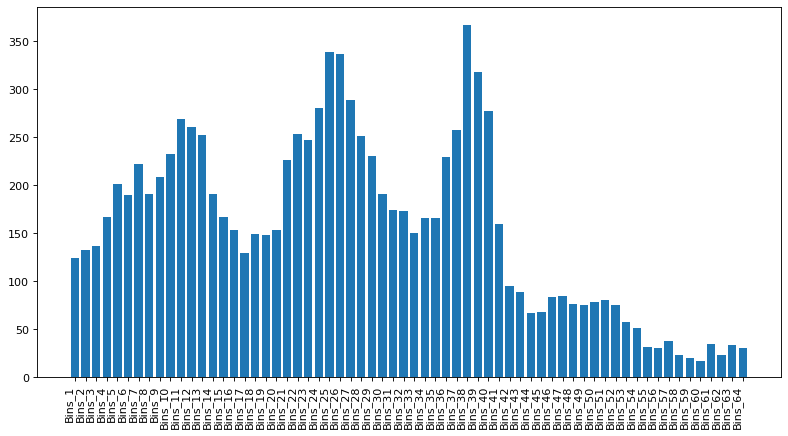

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(OG_image.columns, OG_image.T[3999])
plt.xticks(rotation=90, ha="right")

Extracing Histograms for prewitt edge detection images

In [ ]:
from skimage.filters import prewitt

In [ ]:
edge_per = prewitt(X_train[3999])

Text(0.5, 1.0, 'Prewitt Image')

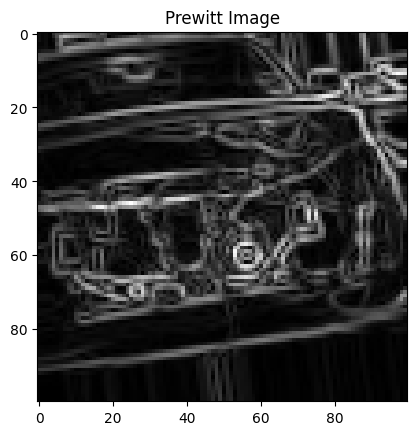

In [ ]:
img = plt.imshow(edge_per, cmap='gray')
plt.title('Prewitt Image')

In [ ]:
def edge_filter(dataset):
  edge_dataset = pd.DataFrame()
  for image in range(dataset.shape[0]):
      img_edge = dataset[image, :,:]
      fd = prewitt(img_edge)
      hist1,bins = np.histogram(fd.ravel(),64)
      df1= pd.DataFrame(hist1)
      df1=df1.transpose()
      edge_dataset= pd.concat([edge_dataset, df1], ignore_index=True)    
  return edge_dataset

In [ ]:
edge_filter_df = edge_filter(X_com)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

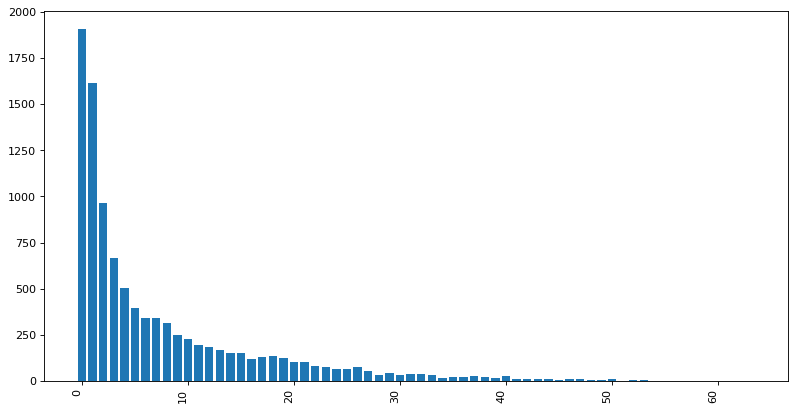

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(edge_filter_df.columns, edge_filter_df.T[5166])
plt.xticks(rotation=90, ha="right")

In [ ]:
columnnames = {}
count = 0
for i in edge_filter_df.columns:
  count += 1
  columnnames[i] = f"Bins_edge{count}"
edge_filter_df.rename(columns = columnnames ,inplace = True)

In [ ]:
frame = [OG_image, edge_filter_df]

In [ ]:
combined_df = pd.concat(frame, axis=1)

In [ ]:
y_data = pd.DataFrame({'label': y_com})

In [ ]:
final_df = pd.concat([combined_df, y_data], axis=1)

In [ ]:
final_df

In [ ]:
#final_df = final_df[(final_df.index % 4 == 0 )]

In [ ]:
X = final_df.iloc[:, 0:-1]
y = final_df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


TSNE 

In [ ]:
embedding_tsne = TSNE(n_components=2)
X_train_tnse = embedding_tsne.fit_transform(X_train)

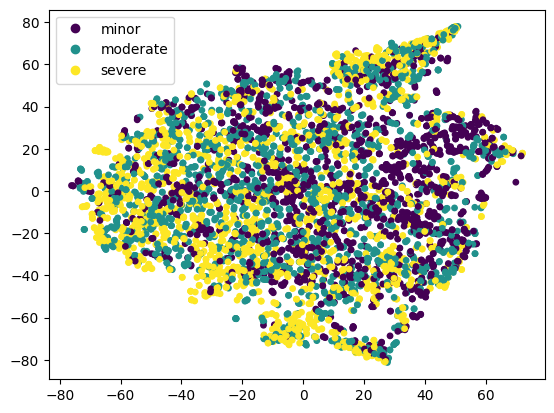

In [ ]:
labels = ['minor', 'moderate', 'severe']
plot = plt.scatter(X_train_tnse[:,0], X_train_tnse[:,1], c=y_train, s=15)
plt.legend(handles=plot.legend_elements()[0], labels=labels)
plt.show()

UMAP

In [ ]:
import umap.umap_ as umap


In [ ]:

umap_test = umap.UMAP()
umap_f = umap_test.fit_transform(X_train)

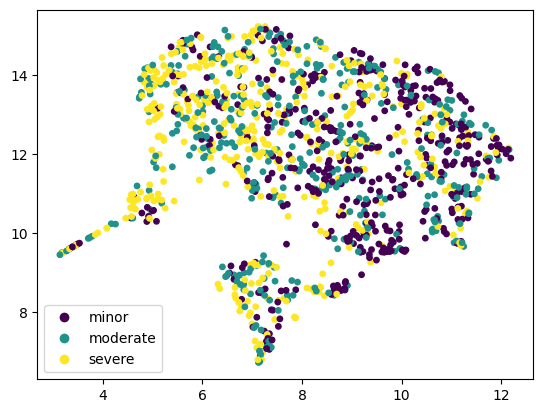

In [ ]:
plot = plt.scatter(umap_f[:,0], umap_f[:,1], c=y_train, s=15)
plt.legend(handles=plot.legend_elements()[0], labels=labels)
plt.show()

Random Forest

In [ ]:
rf1=RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features=None, min_samples_split=3, min_samples_leaf=3, oob_score=True)
rf1.fit(X_train, y_train)
pred=rf1.predict(X_test)

In [ ]:
print('Testing')
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))
pred_train=rf1.predict(X_train)
print('Training')
print("Accuracy for Random Forest: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Testing
Accuracy for Random Forest:  0.5385632437197003
Classification Report
               precision    recall  f1-score   support

         0.0       0.59      0.66      0.63       766
         1.0       0.44      0.37      0.40       750
         2.0       0.56      0.58      0.57       753

    accuracy                           0.54      2269
   macro avg       0.53      0.54      0.53      2269
weighted avg       0.53      0.54      0.53      2269

Training
Accuracy for Random Forest:  0.6114469210426898
Classification Report
               precision    recall  f1-score   support

         0.0       0.64      0.70      0.67      1713
         1.0       0.55      0.46      0.50      1772
         2.0       0.63      0.67      0.65      1809

    accuracy                           0.61      5294
   macro avg       0.61      0.61      0.61      5294
weighted avg       0.61      0.61      0.61      5294



Logistics Regression

With GridSearch
















In [ ]:
param_grid = { 
    'max_depth' : range(1,6),
    'criterion' :['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split':[2,3],
    'min_samples_leaf': [1, 2, 3]
}
   

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
rf = RandomForestClassifier()
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train)

In [ ]:
cv_rf.best_params_


{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
rf1=RandomForestClassifier(criterion= 'gini', max_depth= 3, n_estimators= 100, max_features=None, min_samples_leaf=2, min_samples_split=2)
rf1.fit(X_train, y_train)
pred=rf1.predict(X_test)

In [ ]:
print('Testing')
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))

In [ ]:
pred_train=rf1.predict(X_train)
print('Training')
print("Accuracy for Random Forest: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Scharr Edge Detection

In [ ]:
from skimage.filters import scharr, sobel

In [ ]:
img_scharr = scharr(X_train[3999])

Text(0.5, 1.0, 'Scharr Image')

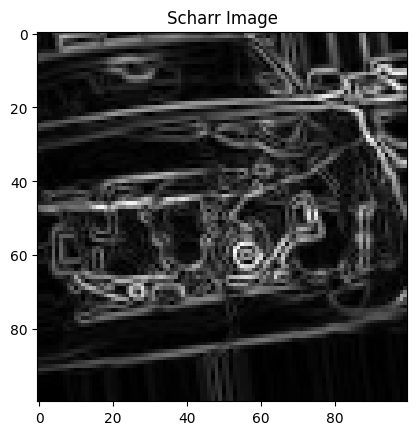

In [ ]:
img = plt.imshow(img_scharr, cmap='gray')
plt.title('Scharr Image')

In [ ]:
img_sobel = sobel(X_train[3999])

Text(0.5, 1.0, 'Sobel Image')

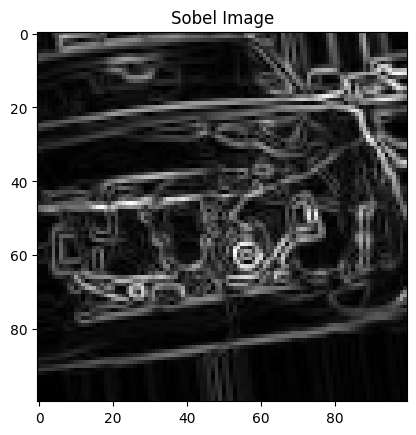

In [ ]:
img = plt.imshow(img_sobel, cmap='gray')
plt.title('Sobel Image')

In [ ]:
def scharr_filter(dataset):
  scharr_dataset = pd.DataFrame()
  for image in range(dataset.shape[0]):
      img_c = dataset[image, :,:]
      fd_scharr = scharr(img_c)
      #hist_scharr,bins = np.histogram(fd_scharr.ravel(),256,[0,256])
      hist_scharr,bins = np.histogram(fd_scharr.ravel(),64)
      df_scharr= pd.DataFrame(hist_scharr)
      df_scharr=df_scharr.transpose()
      scharr_dataset= pd.concat([scharr_dataset, df_scharr], ignore_index=True)   
  return scharr_dataset

In [ ]:
scharr_df = scharr_filter(X_com)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

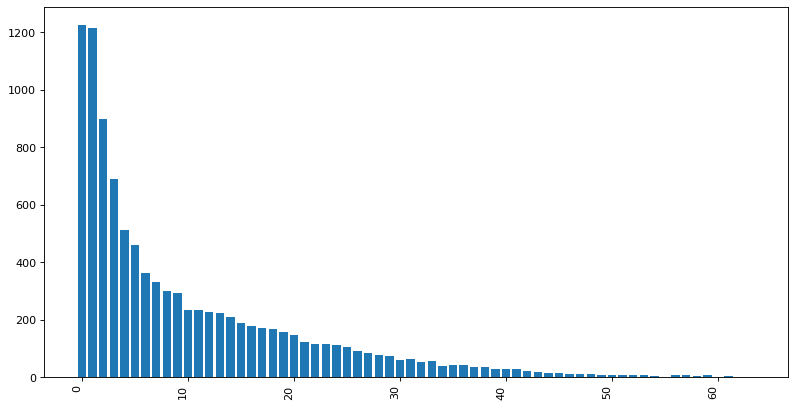

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(scharr_df.columns, scharr_df.T[3999])
plt.xticks(rotation=90, ha="right")

In [ ]:
columnnames = {}
count = 0
for i in scharr_df.columns:
  count += 1
  columnnames[i] = f"Bins_scharr{count}"
scharr_df.rename(columns = columnnames ,inplace = True)

In [ ]:
combined_df2 = pd.concat([OG_image, scharr_df], axis=1)

In [ ]:
final_df2 = pd.concat([combined_df2, y_data], axis=1)

In [ ]:
#final_df2 = final_df2[(final_df2.index % 4 == 0 )]

In [ ]:
X = final_df2.iloc[:, 0:-1]
y = final_df2.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TSNE

In [ ]:
embedding_tsne = TSNE(n_components=2)
X_train_tnse = embedding_tsne.fit_transform(X_train)

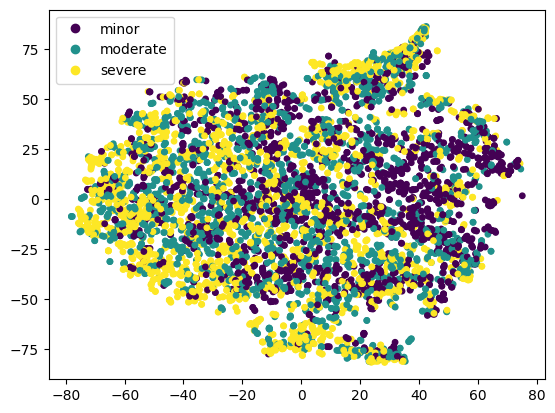

In [ ]:
labels = ['minor', 'moderate', 'severe']
plot = plt.scatter(X_train_tnse[:,0], X_train_tnse[:,1], c=y_train, s=15)
plt.legend(handles=plot.legend_elements()[0], labels=labels)
plt.show()

Random Forest

In [ ]:
rf1=RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features=None, min_samples_leaf=1, min_samples_split=3, oob_score=True)
rf1.fit(X_train, y_train)
pred=rf1.predict(X_test)

In [ ]:
print('Testing')
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))

Testing
Accuracy for Random Forest:  0.5386649041639128
Classification Report
               precision    recall  f1-score   support

         0.0       0.58      0.67      0.62       498
         1.0       0.43      0.37      0.40       493
         2.0       0.58      0.57      0.58       522

    accuracy                           0.54      1513
   macro avg       0.53      0.54      0.53      1513
weighted avg       0.53      0.54      0.53      1513



In [ ]:
pred_train=rf1.predict(X_train)
print('Training')
print("Accuracy for Random Forest: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Training
Accuracy for Random Forest:  0.6034710743801653
Classification Report
               precision    recall  f1-score   support

         0.0       0.63      0.72      0.67      1981
         1.0       0.54      0.45      0.49      2029
         2.0       0.63      0.65      0.64      2040

    accuracy                           0.60      6050
   macro avg       0.60      0.60      0.60      6050
weighted avg       0.60      0.60      0.60      6050



With GridSearch

In [ ]:
rf = RandomForestClassifier(random_state=42)
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 4),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3]})

In [ ]:
cv_rf.best_params_


{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
rf1=RandomForestClassifier(criterion= 'entropy', max_depth= 3, max_features=None, min_samples_leaf=2, min_samples_split=3)
rf1.fit(X_train, y_train)
pred=rf1.predict(X_test)

In [ ]:
print('Testing')
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))

In [ ]:
pred_train=rf1.predict(X_train)
print('Training')
print("Accuracy for Random Forest: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Sobel

In [ ]:
def sobel_filter(dataset):
  sobel_dataset = pd.DataFrame()
  for image in range(dataset.shape[0]):
      img_c = dataset[image, :,:]
      fd_sobel = scharr(img_c)
      #hist_scharr,bins = np.histogram(fd_scharr.ravel(),256,[0,256])
      hist_sobel,bins = np.histogram(fd_sobel.ravel(),64)
      df_sobel= pd.DataFrame(hist_sobel)
      df_sobel=df_sobel.transpose()
      sobel_dataset= pd.concat([sobel_dataset, df_sobel], ignore_index=True)   
  return sobel_dataset

In [ ]:
sobel_df = sobel_filter(X_com)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

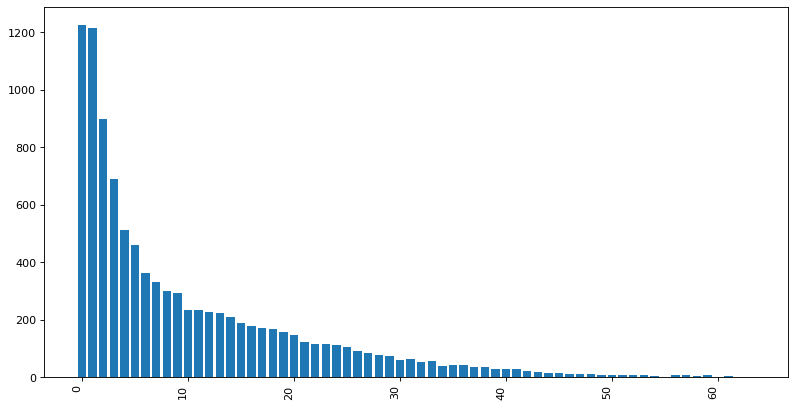

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(sobel_df.columns, sobel_df.T[3999])
plt.xticks(rotation=90, ha="right")

In [ ]:
columnnames = {}
count = 0
for i in sobel_df.columns:
  count += 1
  columnnames[i] = f"Bins_sobel{count}"
sobel_df.rename(columns = columnnames ,inplace = True)

In [ ]:
combined_df3 = pd.concat([OG_image, sobel_df], axis=1)

In [ ]:
final_df3 = pd.concat([combined_df3, y_data], axis=1)

In [ ]:
#final_df3 = final_df3[(final_df3.index % 4 == 0 )]

In [ ]:
final_df3

In [ ]:
X = final_df3.iloc[:, 0:-1]
y = final_df3.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TSNE

In [ ]:
embedding_tsne = TSNE(n_components=2)
X_train_tnse = embedding_tsne.fit_transform(X_train)

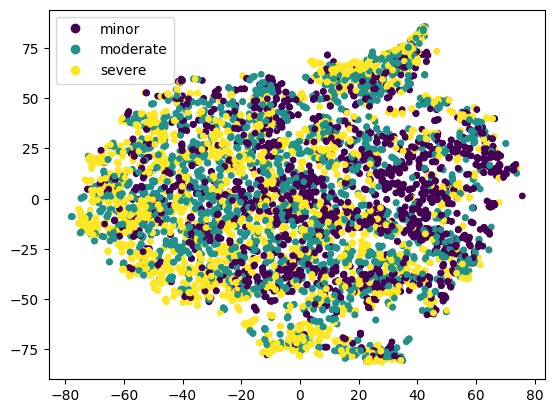

In [ ]:
labels = ['minor', 'moderate', 'severe']
plot = plt.scatter(X_train_tnse[:,0], X_train_tnse[:,1], c=y_train, s=15)
plt.legend(handles=plot.legend_elements()[0], labels=labels)
plt.show()

Random Forest

In [ ]:
rf1=RandomForestClassifier(criterion= 'gini', max_depth= 5, max_features=None, min_samples_leaf=3, min_samples_split=3, oob_score=True)
rf1.fit(X_train, y_train)
pred=rf1.predict(X_test)

In [ ]:
print('Testing')
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))
pred_train=rf1.predict(X_train)
print('Training')
print("Accuracy for Random Forest: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Testing
Accuracy for Random Forest:  0.5333773959021811
Classification Report
               precision    recall  f1-score   support

         0.0       0.59      0.66      0.62       498
         1.0       0.42      0.38      0.40       493
         2.0       0.58      0.56      0.57       522

    accuracy                           0.53      1513
   macro avg       0.53      0.53      0.53      1513
weighted avg       0.53      0.53      0.53      1513

Training
Accuracy for Random Forest:  0.6094214876033058
Classification Report
               precision    recall  f1-score   support

         0.0       0.64      0.70      0.67      1981
         1.0       0.55      0.49      0.52      2029
         2.0       0.63      0.63      0.63      2040

    accuracy                           0.61      6050
   macro avg       0.61      0.61      0.61      6050
weighted avg       0.61      0.61      0.61      6050



In [ ]:
Edge_final = pd.concat([OG_image, edge_filter_df, scharr_df, sobel_df, y_data],axis=1)

In [ ]:
Edge_final.to_csv('/content/drive/MyDrive/edge_feature_combined.csv')